In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows=100
pd.set_option('display.max_columns', None)

In [2]:
np.set_printoptions(suppress=True, linewidth=200, edgeitems=100)

# Pipeline and column transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

# Data transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Data splitter and model evaluator
from sklearn.model_selection import train_test_split, validation_curve, learning_curve, GridSearchCV

# Learning models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor  # Need to install

# Performance metrics
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, learning_curve

In [3]:
#with clusters
file_path = 'student8/s8.xlsx'
df = pd.read_excel(file_path, dtype={"outcome": str})

In [4]:
# Fill NaN values in the 'Session' and 'Start Time' columns with the previous non-null value
df['session'] = df['session'].ffill()
df['start_time'] = df['start_time'].ffill()
#df['end_time'] = df['end_time'].ffill()

df[['PI_score','deltaPI_score_future1', 'deltaPI_score_past1']] = df[['PI_score','deltaPI_score_future1', 'deltaPI_score_past1']].ffill()

### missing values

In [5]:
blank_summary = df.isnull().sum()
blank_summary = blank_summary[blank_summary > 0]  # Filter columns with missing values only
print(blank_summary)

end_time                   22003
Duration (min:sec)         22003
Score                      22003
At LC                      27842
Points                     22003
skill_specified_time           5
ans_time_ratio                 5
mean_break                 23317
PI_chapter                   103
deltaPI_chapter_future1      206
deltaPI_chapter_past1        206
PI_skill                    1125
deltaPI_skill_future1       2250
deltaPI_skill_past1         2250
PI_day                       850
deltaPI_day_future1         1690
deltaPI_day_past1           1690
PI_score_change            22003
dtype: int64


In [6]:
df.describe()

,start_time,end_time,At LC,grade,skill_level_change,L_num_completed_demo,L_num_correct_assisted,L_num_qs_first_correct,L_num_wrong_start_correct_end,L_total_qs,first_ans_time,skill_specified_time,level_begin,level_end,chapter,skill_seq,skill_id,skill_chapter_id,is_quit_correct,is_quit_wrong,weekdays,school_year,time_of_day,ans_time_ratio,duration,mean_break,cum_time_session,cum_time_day,break_time_bw_sessions,cumulative break_time_bw_sessions,break_ratio,time_since_same_skill,num_hints,num_responses,num_wrong_responses,curr_resp,cum_resp_same_skill,cum_wrong_same_skill,cum_hints_same_skill,first_resp,PI_chapter,deltaPI_chapter_future1,deltaPI_chapter_past1,PI_skill,deltaPI_skill_future1,deltaPI_skill_past1,PI_day,deltaPI_day_future1,deltaPI_day_past1,consec_wrong_day,cum_wrong_sess,cum_wrong_day,cum_hints_day,cum_same_skill_day,same_skill_wrong,session_id,PI_score,PI_score_change,deltaPI_score_future1,deltaPI_score_past1
count,27842,5839,0.0,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27837.000000,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27837.000000,27842.000000,4525.000000,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,2.784200e+04,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27739.000000,27636.000000,27636.000000,26717.000000,25592.000000,25592.000000,26992.000000,26152.000000,26152.000000,27842.000000,27842.000000,27842.000000,27842.00000,27842.000000,27842.000000,27842.000000,27842.000000,5839.000000,27842.000000,27842.000000
mean,2022-03-23 07:47:11.076072192,2022-03-07 14:49:09.421989888,NaN,7.854752,20.911714,0.206343,0.001221,1.178723,0.477588,1.719704,51.142518,102.259403,1.864952,2.261440,7.738381,7.211120,529.145212,52.587170,0.068063,0.039221,0.687846,0.771389,1.761691,0.518473,63.062352,50.969166,256.710527,4163.687397,474.352453,2716.130594,0.237629,1.896607e+06,0.021371,1.204368,0.373141,0.834243,20.307449,1.655485,0.488004,0.747432,102.546126,0.622123,0.622123,8.526257,0.625938,0.625938,23.857810,0.623203,0.623203,0.265570,0.956361,6.512391,0.41969,5.091840,0.168882,0.816788,62.079120,0.106143,0.131856,0.160433
min,2020-08-09 14:09:53,2020-08-09 14:11:24,NaN,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-9.000000,-1.000000,-1.000000,-15.000000,-1.000000,-1.000000,-14.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,-3.540000,-3.540000,-3.540000
25%,2020-12-30 19:18:38,2021-01-20 07:43:29,NaN,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,60.000000,0.000000,1.000000,7.000000,4.000000,324.000000,35.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.180000,0.000000,2.000000,42.800000,573.700000,3.000000,8.000000,0.009106,0.000000e+00,0.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,35.930000,0.000000,0.000000,0.000000
50%,2022-03-25 14:54:37,2022-03-11 20:28:33,NaN,8.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.173913,90.000000,2.000000,2.000000,8.000000,6.000000,506.000000,51.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.300000,0.000000,11.600000,108.000000,1247.000000,9.000000,88.000000,0.094564,8.600000e+01,0.000000,1.000000,0.000000,1.000000,14.000000,1.000000,0.000000,1.000000,80.000000,1.000000,1.000000,7.000000,1.000000,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.00000,2.000000,0.000000,1.000000,

## Label 

In [7]:
#'deltaPI_skill_future1', 'deltaPI_skill_past1','deltaPI_day_future1', 'deltaPI_day_past1', 'deltaPI_score_future1', 'deltaPI_score_past1'

cols = [
    'deltaPI_skill_future1', 'deltaPI_skill_past1',
    'deltaPI_day_future1', 'deltaPI_day_past1',
    'deltaPI_score_future1', 'deltaPI_score_past1'
]

df = df.dropna(subset=cols)

df['negative'] = (df[cols] <= 0).all(axis=1).astype(int)

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Define your features
features = [
    'skill_specified_time', 'level_begin', 'level_end', 'chapter', 'skill_id', 
    'weekdays', 'school_year', 'time_of_day', 'ans_time_ratio', 
    'cum_time_session', 'cum_time_day', 'break_time_bw_sessions', 'cumulative break_time_bw_sessions', 
    'break_ratio', 'time_since_same_skill', 'num_hints', 'num_responses', 'num_wrong_responses', 'curr_resp', 'cum_resp_same_skill', 
    'cum_wrong_same_skill', 'cum_hints_same_skill', 'first_resp', 'PI_skill', 'PI_day', 'consec_wrong_day', 
    'cum_wrong_sess', 'cum_wrong_day', 'cum_hints_day', 'cum_same_skill_day', 'same_skill_wrong', 'session_id', 'PI_score',
    'deltaPI_skill_past1','deltaPI_day_past1','deltaPI_score_past1'
    ] #delete "final response", 'accu hints of the same skill', 'break time between sessions',

# Define categorical and numerical features
nom_features = ['time_of_day','session_id']
ord_features=['skill_id','level_begin', 'level_end','first_resp', 'weekdays','school_year',
              'curr_resp','first_resp','same_skill_wrong',
              'deltaPI_day_past1','deltaPI_skill_past1']  

num_features = [col for col in features if col not in nom_features and col not in ord_features]

In [9]:
missing = df[features].isnull().sum()
missing = missing[missing > 0]

print("Features with missing values:")
print(missing)

Features with missing values:
skill_specified_time    2
ans_time_ratio          2
dtype: int64


In [10]:
df = df.dropna(subset=['skill_specified_time'])

df=df.reset_index(drop=True)

In [11]:
df_clustering=df[features]

# Define Preprocessing Steps

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, learning_curve, StratifiedKFold
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Assume nom_features, ord_features, num_features, X_train, y_train, X_test, y_test are defined

nom_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    PowerTransformer(method='yeo-johnson'),
    OneHotEncoder(handle_unknown='ignore')
)

ord_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

num_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_features),
        ('nom', nom_pipe, nom_features),
        ('ord', ord_pipe, ord_features)
    ]
)



/Users/lingli/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k= 2 → silhouette = 0.225, inertia = 689919


/Users/lingli/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k= 3 → silhouette = 0.136, inertia = 630251


/Users/lingli/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k= 4 → silhouette = 0.136, inertia = 583828


/Users/lingli/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k= 5 → silhouette = 0.142, inertia = 559403


/Users/lingli/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k= 6 → silhouette = 0.154, inertia = 537714


/Users/lingli/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k= 7 → silhouette = 0.156, inertia = 515742


/Users/lingli/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k= 8 → silhouette = 0.149, inertia = 499161


/Users/lingli/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k= 9 → silhouette = 0.170, inertia = 481670


/Users/lingli/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=10 → silhouette = 0.153, inertia = 456727


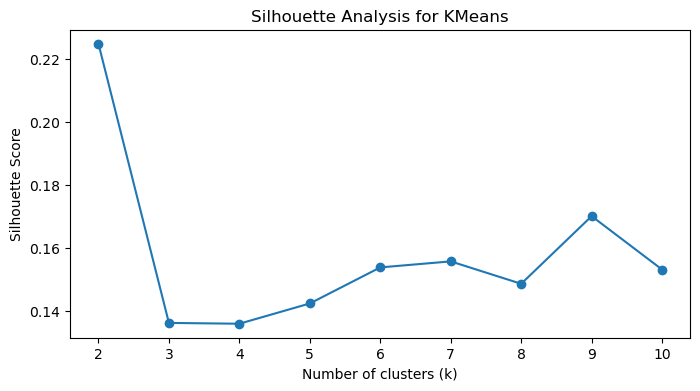

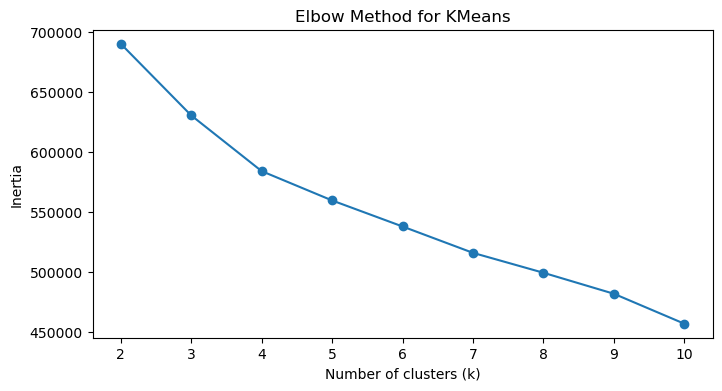


>>> Best k by silhouette: 2


In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ─── 3) Preprocess your training data ────────────────────────────────────────
X_train_prep = preprocessor.fit_transform(df_clustering)

# ─── 4) Silhouette & inertia analysis to pick k ─────────────────────────────
range_n_clusters = range(2, 11)
sil_scores = []
inertias = []

for k in range_n_clusters:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_train_prep)
    sil = silhouette_score(X_train_prep, labels)
    sil_scores.append(sil)
    inertias.append(km.inertia_)
    print(f"k={k:2d} → silhouette = {sil:.3f}, inertia = {km.inertia_:.0f}")

# ─── 5) Plot Silhouette score vs. k ─────────────────────────────────────────
plt.figure(figsize=(8,4))
plt.plot(list(range_n_clusters), sil_scores, marker='o')
plt.xticks(list(range_n_clusters))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for KMeans")
plt.show()

# ─── 6) Plot Inertia vs. k (Elbow Method) ──────────────────────────────────
plt.figure(figsize=(8,4))
plt.plot(list(range_n_clusters), inertias, marker='o')
plt.xticks(list(range_n_clusters))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()

# ─── 7) Choose best k by highest silhouette ────────────────────────────────
best_k = list(range_n_clusters)[int(np.argmax(sil_scores))]
print(f"\n>>> Best k by silhouette: {best_k}")


In [14]:
# ─── 8) Re-fit KMeans with best_k and assign clusters ───────────────────────
final_km = KMeans(n_clusters=best_k, random_state=0)
final_labels = final_km.fit_predict(X_train_prep)
df['cluster'] = final_labels

/Users/lingli/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
# Add “quit” to any DataFrame df:
df['quit'] = ((df['is_quit_correct'] == 1) | (df['is_quit_wrong'] == 1)).astype(int)

In [27]:
from sklearn.decomposition import PCA
import pandas as pd
import plotly.express as px

# 1) Run PCA
pca = PCA(n_components=3, random_state=0)
X_pca = pca.fit_transform(X_train_prep)

# 2) Build DataFrame
plot_df = pd.DataFrame(
    X_pca,
    columns=['PC1','PC2','PC3'],
    index=df.index
)
plot_df['cluster'] = df['cluster']  # bring in your 0/1 labels

# 3) (Optional) Make human-readable labels
plot_df['cluster_label'] = plot_df['cluster'].map({
    0: 'Cluster 0',
    1: 'Cluster 1'
})

# 4) Plot with explicit red/blue mapping
fig = px.scatter_3d(
    plot_df,
    x='PC1', y='PC2', z='PC3',
    color='cluster_label',  # use the string labels
    color_discrete_map={
        'Cluster 0': 'blue',
        'Cluster 1': 'red'
    },
    title='3D PCA Scatter (blue vs. red clusters)'
)
fig.update_traces(marker=dict(size=1))

# 5) Show and (if you like) save
fig.show()
fig.write_html('3d_pca_clusters_blue_red.html')
print("Saved to 3d_pca_clusters_blue_red.html")


Saved to 3d_pca_clusters_blue_red.html


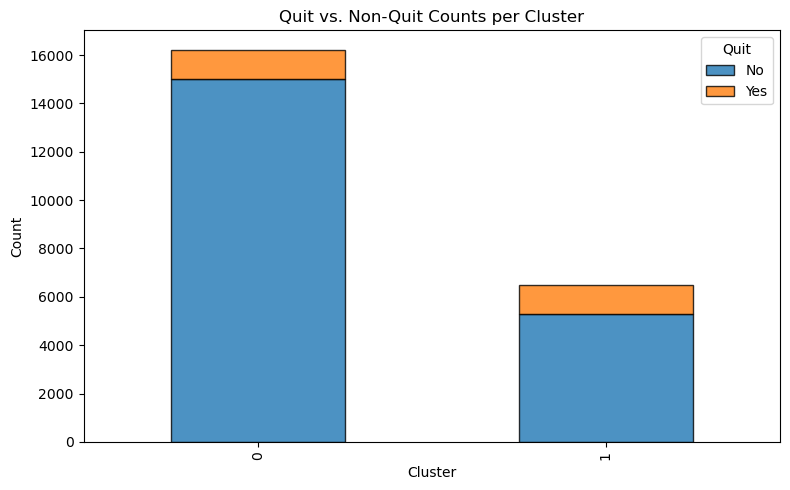

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# 1) Aggregate quit statistics by cluster
cluster_stats = df.groupby('cluster')['quit'].agg(
    total_count='size',
    quit_count='sum'
).reset_index()
cluster_stats['quit_rate'] = cluster_stats['quit_count'] / cluster_stats['total_count']


# 3) (Optional) Stacked bar chart of quit vs. non-quit counts
ct = pd.crosstab(df['cluster'], df['quit'])
ct.columns = ['no_quit', 'quit']
ct = ct.sort_index()

ct.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    edgecolor='k',
    alpha=0.8
)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Quit vs. Non-Quit Counts per Cluster')
plt.legend(title='Quit', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


In [17]:
# 1) Define bad_quit: 1 when quit==1 AND cluster==1, else 0
df['bad_quit'] = (
    (df['quit'] == 1) &
    (df['cluster'] == 1)
).astype(int)

df['negative'] = df['negative'] + df['bad_quit']


In [18]:
# ensure datetime
df['start_time'] = pd.to_datetime(df['start_time'])

# pre‐compute a date column to speed up the date check
df['date'] = df['start_time'].dt.date

# window size in seconds
window_secs = 5 * 60  # 600 seconds

def count_next_10min_same_day(row):
    t0 = row['cum_time_day']
    t1 = t0 + window_secs
    d0 = row['date']
    mask = (
        (df['cum_time_day'] >= t0) &
        (df['cum_time_day'] <= t1) &
        (df['date'] == d0)
    )
    return df.loc[mask, 'negative'].sum()

df['cum_negative'] = df.apply(count_next_10min_same_day, axis=1)


print(df['cum_negative'].describe())
print("Value counts:\n", df['cum_negative'].value_counts())

count    22714.000000
mean         0.843357
std          1.811709
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         26.000000
Name: cum_negative, dtype: float64
Value counts:
 cum_negative
0     15121
1      3594
2      1426
3       930
4       585
5       347
6       219
7       173
8       115
9        67
10       38
11       33
12       18
13       11
14        6
17        6
18        3
19        3
25        3
16        3
15        3
21        2
23        2
24        2
26        2
22        1
20        1
Name: count, dtype: int64


In [19]:
def discretize_cum_negative(x):
    if 0 <= x <= 1:
        return 0
    elif 2 <= x <= 4:
        return 1
    elif x >= 5:
        return 2
    else:
        return np.nan  # Handle unexpected values

df['cum_negative_class'] = df['cum_negative'].apply(discretize_cum_negative)

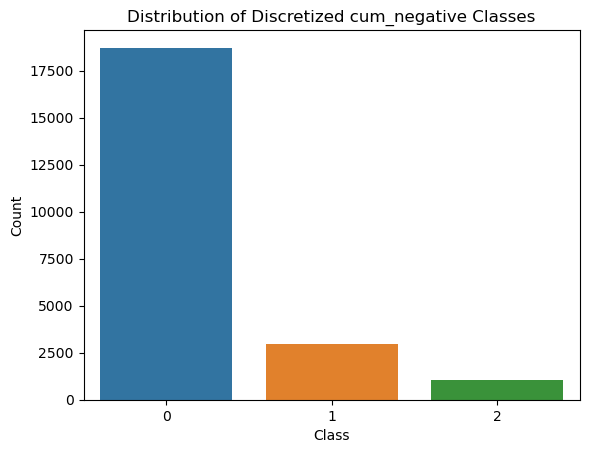

cum_negative_class
0    18715
1     2941
2     1058
Name: count, dtype: int64


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count of each class
sns.countplot(x='cum_negative_class', data=df)
plt.title('Distribution of Discretized cum_negative Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Optional: print value counts
print(df['cum_negative_class'].value_counts().sort_index())


In [21]:
# Make sure df contains your original features plus the 'quit' and 'cluster' columns
output_path = 'student8/df_clustering_with_bad_quit_5min.xlsx'
df.to_excel(output_path, index=False)
print(f"Saved clustered DataFrame to {output_path}")

Saved clustered DataFrame to student8/df_clustering_with_bad_quit_5min.xlsx
